## Import Libraries

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Load and Inspect the Data

In [88]:
# Load HDI data (CSV)
hdi_df = pd.read_csv("HDI.csv")

# Load World Bank data (Excel)
wb_df = pd.read_excel("WorldBank.xlsx")

In [89]:
# Quick inspection
print(hdi_df.shape)
print(hdi_df.columns)
print(hdi_df.head(3))

print(wb_df.shape)
print(wb_df.columns)
print(wb_df.head(3))

(206, 1008)
Index(['iso3', 'country', 'hdicode', 'region', 'hdi_rank_2021', 'hdi_1990',
       'hdi_1991', 'hdi_1992', 'hdi_1993', 'hdi_1994',
       ...
       'mf_2012', 'mf_2013', 'mf_2014', 'mf_2015', 'mf_2016', 'mf_2017',
       'mf_2018', 'mf_2019', 'mf_2020', 'mf_2021'],
      dtype='object', length=1008)
  iso3      country hdicode region  hdi_rank_2021  hdi_1990  hdi_1991  \
0  AFG  Afghanistan     Low     SA          180.0     0.273     0.279   
1  AGO       Angola  Medium    SSA          148.0       NaN       NaN   
2  ALB      Albania    High    ECA           67.0     0.647     0.629   

   hdi_1992  hdi_1993  hdi_1994  ...  mf_2012  mf_2013  mf_2014  mf_2015  \
0     0.287     0.297     0.292  ...     1.86     1.88     1.66     1.62   
1       NaN       NaN       NaN  ...     4.09     4.53     3.97     3.59   
2     0.614     0.617     0.624  ...    12.44    11.49    13.14    12.61   

   mf_2016  mf_2017  mf_2018  mf_2019  mf_2020  mf_2021  
0     1.66     1.41     1.32  

## Step 2: Rename Columns & Standardize Formats

In [90]:
# Standardize column names
hdi_df.columns = hdi_df.columns.str.lower().str.strip().str.replace(" ", "_").str.replace(r"[^\w\s]", "", regex=True)
wb_df.columns = wb_df.columns.str.lower().str.strip().str.replace(" ", "_").str.replace(r"[^\w\s]", "", regex=True)

In [91]:
# Drop columns or rows with excessive nulls
wb_df = wb_df.dropna(thresh=len(wb_df.columns) * 0.6)
hdi_df = hdi_df.dropna(thresh=len(hdi_df.columns) * 0.6)


## Step 3: Merge the Datasets
To merge, both datasets need a common key — most likely country and year. Let’s align them:

In [92]:
# Reshape hdi_df from wide to long format for HDI values
hdi_long = hdi_df.melt(
	id_vars=['iso3', 'country', 'hdicode', 'region', 'hdi_rank_2021'],
	value_vars=[col for col in hdi_df.columns if col.startswith('hdi_') and col[4:].isdigit()],
	var_name='year',
	value_name='hdi'
)
hdi_long['year'] = hdi_long['year'].str.replace('hdi_', '').astype(int)

# Ensure year columns are in same format
wb_df['year'] = wb_df['year'].astype(int)

# Merge on 'country' and 'year'
merged_df = pd.merge(wb_df, hdi_long, left_on=['country_name', 'year'], right_on=['country', 'year'], how='inner')

# Inspect merged data
print(merged_df.shape)
print(merged_df.columns)
merged_df.head()


(4402, 21)
Index(['country_name', 'country_code', 'region_x', 'incomegroup', 'year',
       'birth_rate_crude_per_1000_people', 'death_rate_crude_per_1000_people',
       'electric_power_consumption_kwh_per_capita', 'gdp_usd',
       'gdp_per_capita_usd', 'individuals_using_the_internet__of_population',
       'infant_mortality_rate_per_1000_live_births',
       'life_expectancy_at_birth_years',
       'population_density_people_per_sq_km_of_land_area',
       'unemployment__of_total_labor_force_modeled_ilo_estimate', 'iso3',
       'country', 'hdicode', 'region_y', 'hdi_rank_2021', 'hdi'],
      dtype='object')


,country_name,country_code,region_x,incomegroup,year,birth_rate_crude_per_1000_people,death_rate_crude_per_1000_people,electric_power_consumption_kwh_per_capita,gdp_usd,gdp_per_capita_usd,...,infant_mortality_rate_per_1000_live_births,life_expectancy_at_birth_years,population_density_people_per_sq_km_of_land_area,unemployment__of_total_labor_force_modeled_ilo_estimate,iso3,country,hdicode,region_y,hdi_rank_2021,hdi
0,Afghanistan,AFG,South Asia,Low income,2018,NaN,NaN,NaN,1.936300e+10,520.897,...,47.9,NaN,56.9378,1.542,AFG,Afghanistan,Low,SA,180.0,0.483
1,Afghanistan,AFG,South Asia,Low income,2017,33.211,6.575,NaN,2.019180e+10,556.302,...,49.5,64.130,55.5960,1.559,AFG,Afghanistan,Low,SA,180.0,0.482
2,Afghanistan,AFG,South Asia,Low income,2016,33.981,6.742,NaN,1.936260e+10,547.228,...,51.2,63.763,54.1971,1.634,AFG,Afghanistan,Low,SA,180.0,0.481
3,Afghanistan,AFG,South Asia,Low income,2015,34.809,6.929,NaN,1.990710e+10,578.466,...,53.1,63.377,52.7121,1.679,AFG,Afghanistan,Low,SA,180.0,0.478
4,Afghanistan,AFG,South Asia,Low income,2014,35.706,7.141,NaN,2.048490e+10,613.856,...,55.1,62.966,51.1148,1.735,AFG,Afghanistan,Low,SA,180.0,0.479


## Step 4: Handle Missing Values
We’ll now clean the merged dataset

In [93]:
# Check missing values
print(merged_df.isnull().sum())

# Fill missing numeric values with mean
for col in merged_df.select_dtypes(include='number').columns:
    merged_df[col] = merged_df[col].fillna(merged_df[col].mean())

country_name                                                  0
country_code                                                  0
region_x                                                      0
incomegroup                                                   0
year                                                          0
birth_rate_crude_per_1000_people                            150
death_rate_crude_per_1000_people                            150
electric_power_consumption_kwh_per_capita                  1420
gdp_usd                                                     145
gdp_per_capita_usd                                          148
individuals_using_the_internet__of_population               641
infant_mortality_rate_per_1000_live_births                    0
life_expectancy_at_birth_years                              154
population_density_people_per_sq_km_of_land_area             86
unemployment__of_total_labor_force_modeled_ilo_estimate     151
iso3                                    

In [94]:
# Drop rows with missing country/year if any
merged_df.dropna(subset=['country', 'year'], inplace=True)

In [95]:
# Save cleaned dataset
merged_df.to_csv("data_cleaned.csv", index=False)

## Step 5: Basic Exploratory Data Analysis (EDA)

**1.Generate descriptive statistics**


In [96]:
print("\nDescriptive Statistics:")
merged_df.describe()


Descriptive Statistics:


,year,birth_rate_crude_per_1000_people,death_rate_crude_per_1000_people,electric_power_consumption_kwh_per_capita,gdp_usd,gdp_per_capita_usd,individuals_using_the_internet__of_population,infant_mortality_rate_per_1000_live_births,life_expectancy_at_birth_years,population_density_people_per_sq_km_of_land_area,unemployment__of_total_labor_force_modeled_ilo_estimate,hdi_rank_2021,hdi
count,4402.000000,4402.000000,4402.000000,4402.000000,4.402000e+03,4402.000000,4402.000000,4402.000000,4402.000000,4402.000000,4402.000000,4402.000000,4402.000000
mean,2003.987279,24.013868,8.992385,3963.101533,3.191946e+11,10314.865470,23.112923,34.420718,68.096126,172.022510,8.001225,93.968196,0.666658
std,8.357270,11.568070,3.947944,4353.493897,1.281847e+12,15847.409815,26.197189,32.853270,9.788778,553.583640,6.166605,56.822240,0.163192
min,1990.000000,7.600000,1.127000,0.000000,7.595110e+07,111.927000,0.000000,1.400000,26.172000,1.405900,0.140000,1.000000,0.216000
25%,1997.000000,13.333000,6.298000,1290.760000,5.272372e+09,908.230250,1.191050,8.100000,61.990000,26.141275,3.700750,42.000000,0.552000
50%,2004.000000,22.406250,8.500000,3963.101533,2.222725e+10,3478.890000,15.335800,21.650000,70.212000,70.548150,6.588000,91.000000,0.676000
75%,2011.000000,32.916500,10.700000,3963.101533,1.717500e+11,11278.500000,32.515900,53.175000,75.376000,134.134750,10.359000,146.000000,0.791750
max,2018.000000,55.485000,41.359000,54799.200000,2.050000e+13,118824.000000,100.000000,176.000000,84.099800,7953.000000,37.940000,191.000000,0.962000


**2. visualize data distributions and correlations**

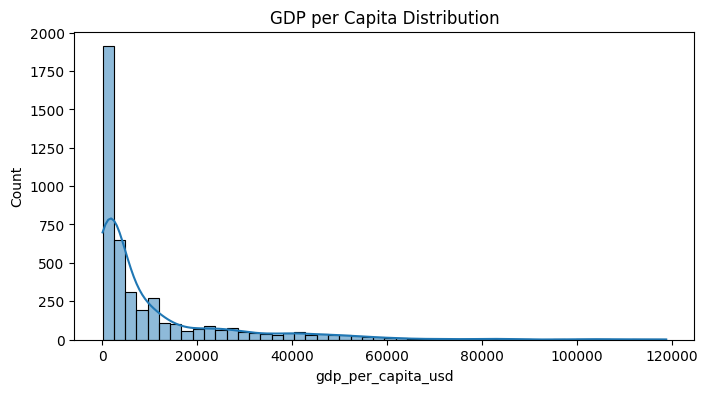

In [97]:
# Distribution of GDP
plt.figure(figsize=(8, 4))
sns.histplot(merged_df['gdp_per_capita_usd'], bins=50, kde=True)
plt.title("GDP per Capita Distribution")
plt.show()


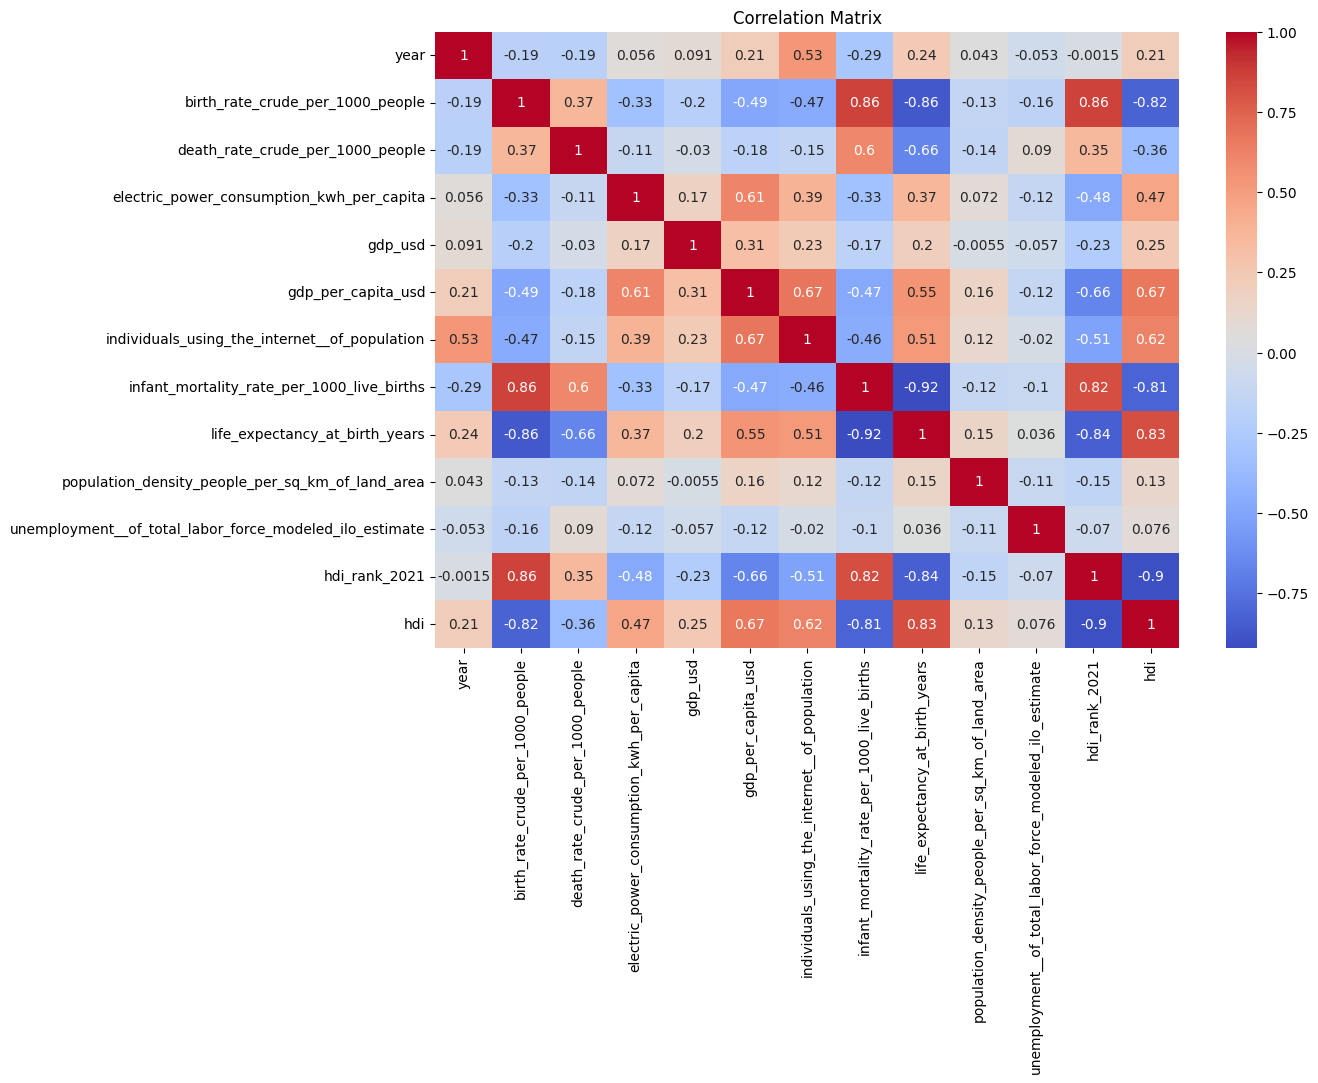

In [98]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(merged_df.corr(numeric_only=True), cmap='coolwarm', annot=True)
plt.title("Correlation Matrix")
plt.show()

### EDA Question 1: Which countries have experienced the highest growth in population and GDP? Is there overlap?

In [99]:
# Group by country and calculate growth over time
gdp_growth = merged_df.groupby('country')['gdp_per_capita_usd'].agg(['min', 'max']).reset_index()
gdp_growth['gdp_growth'] = gdp_growth['max'] - gdp_growth['min']

pop_growth = merged_df.groupby('country')['population_density_people_per_sq_km_of_land_area'].agg(['min', 'max']).reset_index()
pop_growth['population_growth'] = pop_growth['max'] - pop_growth['min']

# Top 10 countries by GDP growth
top_gdp = gdp_growth.sort_values(by='gdp_growth', ascending=False).head(10)

# Top 10 countries by population growth
top_pop = pop_growth.sort_values(by='population_growth', ascending=False).head(10)

print("Top 10 GDP Growth Countries:\n", top_gdp[['country', 'gdp_growth']])
print("\nTop 10 Population Growth Countries:\n", top_pop[['country', 'population_growth']])

# Find overlapping countries
overlap = set(top_gdp['country']).intersection(set(top_pop['country']))
print("\nCountries in both GDP and Population Growth Top 10:\n", list(overlap))


Top 10 GDP Growth Countries:
            country  gdp_growth
80      Luxembourg    84178.90
103         Norway    75095.30
113          Qatar    70951.80
65         Ireland    64758.30
123      Singapore    52720.10
132    Switzerland    50547.30
6        Australia    50516.10
73          Kuwait    50075.61
61         Iceland    49586.50
147  United States    38752.40

Top 10 Population Growth Countries:
         country  population_growth
123   Singapore         3405.04000
9       Bahrain         1298.52900
84     Maldives          975.13000
10   Bangladesh          446.98600
86        Malta          404.25000
75      Lebanon          395.49200
116      Rwanda          262.07700
33      Comoros          226.07600
23      Burundi          223.38100
13      Belgium          205.19249

Countries in both GDP and Population Growth Top 10:
 ['Singapore']


C:\Users\YSS\AppData\Local\Temp\ipykernel_16076\1116418502.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_pop, x='country', y='population_growth', palette='viridis')


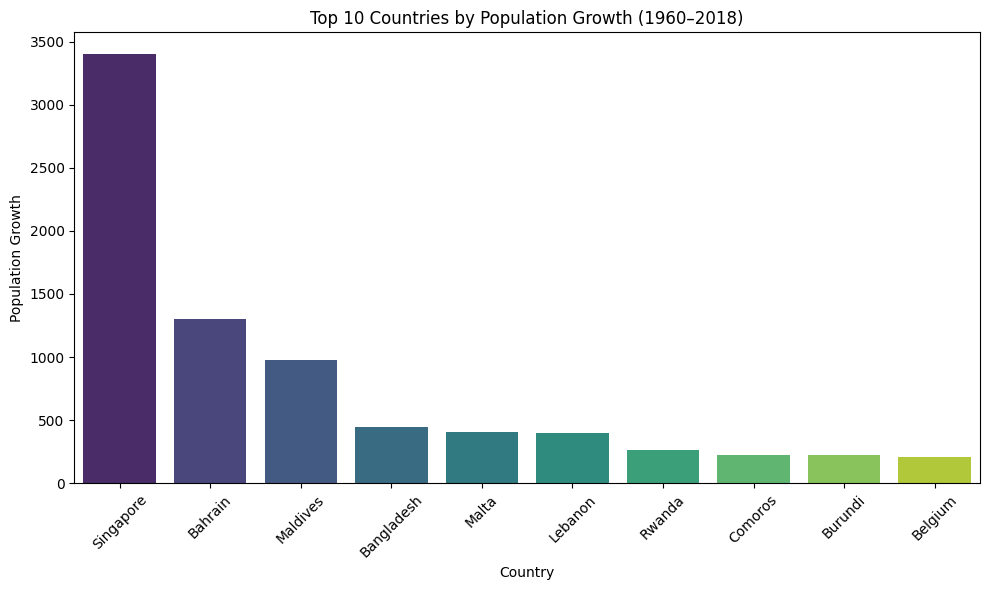

In [100]:
pop_growth = merged_df.groupby('country')['population_density_people_per_sq_km_of_land_area'].agg(['min', 'max']).reset_index()
pop_growth['population_growth'] = pop_growth['max'] - pop_growth['min']
top_pop = pop_growth.sort_values(by='population_growth', ascending=False).head(10)

# Vertical bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_pop, x='country', y='population_growth', palette='viridis')
plt.title('Top 10 Countries by Population Growth (1960–2018)')
plt.xlabel('Country')
plt.ylabel('Population Growth')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\YSS\AppData\Local\Temp\ipykernel_16076\2115657479.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_pop, y='country', x='population_growth', palette='coolwarm')


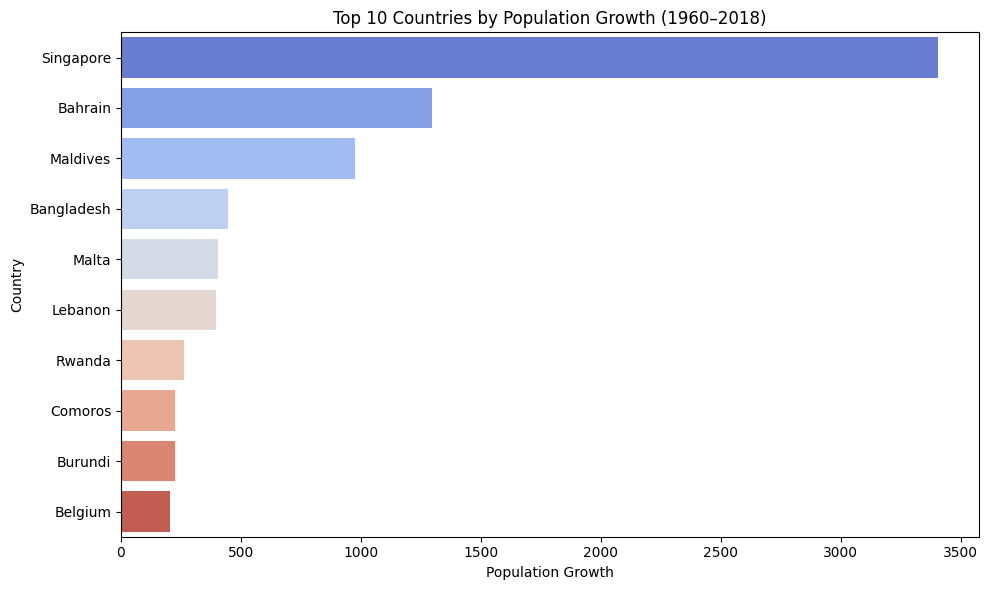

In [102]:
# Ensure top_pop is defined
if 'top_pop' not in locals():
	pop_growth = merged_df.groupby('country')['gdp_per_capita_usd'].agg(['min', 'max']).reset_index()
	pop_growth['gdp_growth'] = pop_growth['max'] - pop_growth['min']
	top_pop = pop_growth.sort_values(by='gdp_growth', ascending=False).head(10)

# Horizontal bar plot 
plt.figure(figsize=(10, 6))
sns.barplot(data=top_pop, y='country', x='population_growth', palette='coolwarm')
plt.title('Top 10 Countries by Population Growth (1960–2018)')
plt.xlabel('Population Growth')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

C:\Users\YSS\AppData\Local\Temp\ipykernel_16076\3212889857.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_gdp, y='country', x='gdp_growth', palette='viridis')


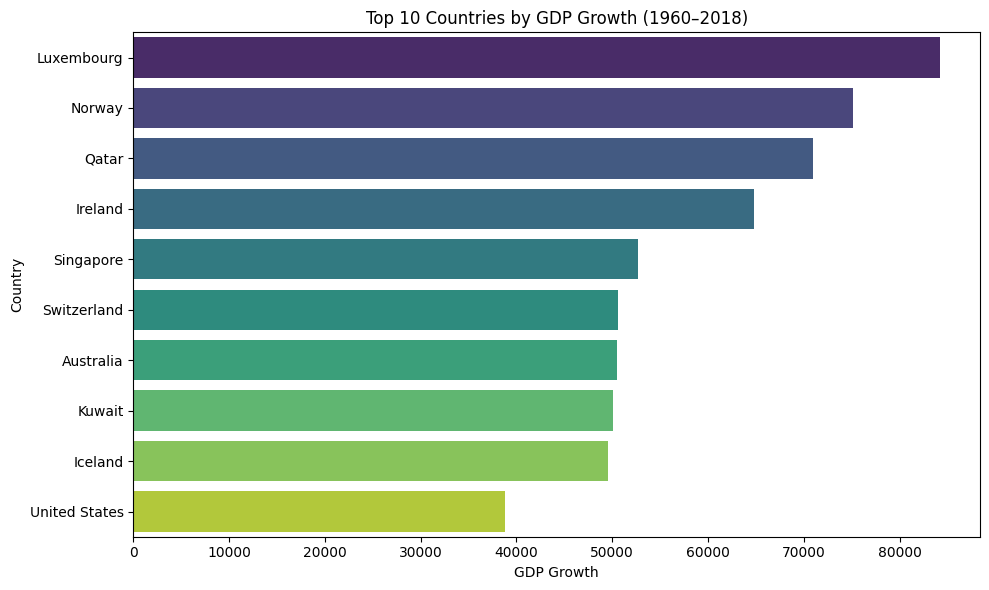

In [118]:
# Horizontal bar plot for Top 10 Countries by GDP Growth
plt.figure(figsize=(10, 6))
sns.barplot(data=top_gdp, y='country', x='gdp_growth', palette='viridis')
plt.title('Top 10 Countries by GDP Growth (1960–2018)')
plt.xlabel('GDP Growth')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

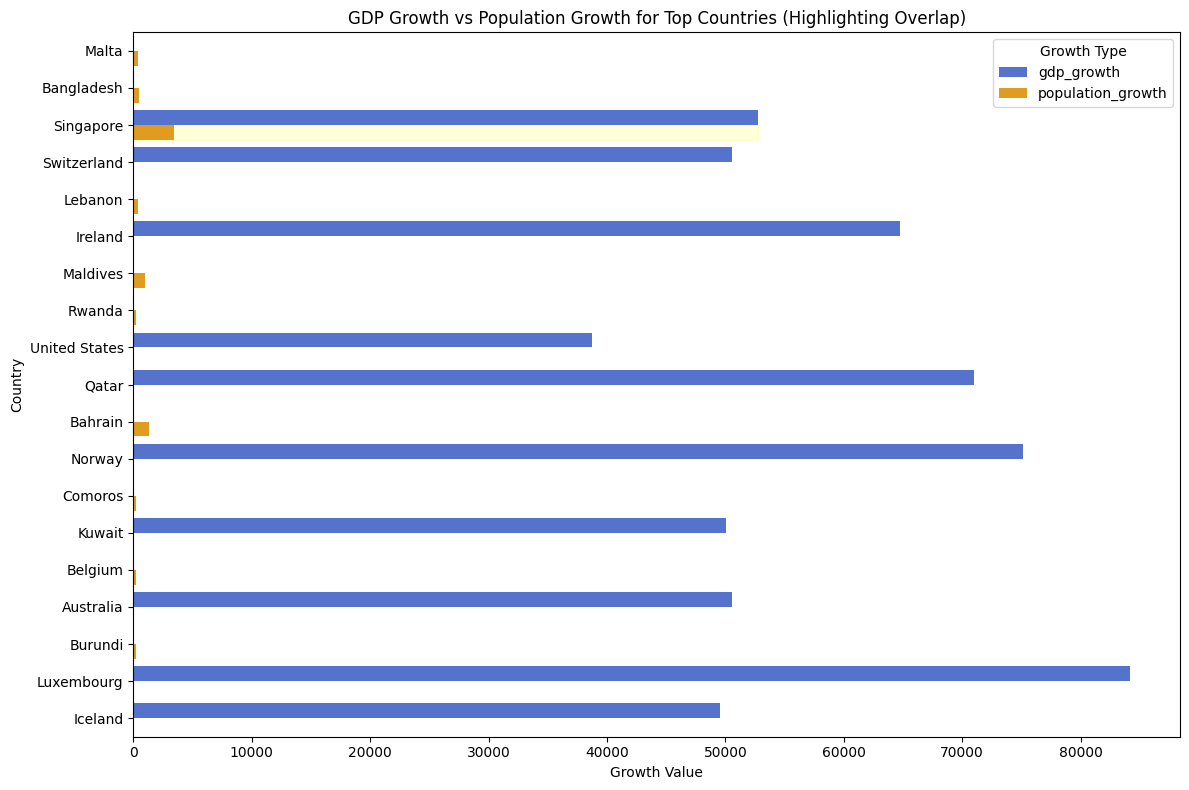

In [134]:
# Combine top 10 countries from both lists
top_countries = list(set(top_gdp['country']).union(set(top_pop['country'])))
combined_growth = pd.DataFrame({
    'country': top_countries
})
combined_growth = combined_growth.merge(top_gdp[['country', 'gdp_growth']], on='country', how='left')
combined_growth = combined_growth.merge(top_pop[['country', 'population_growth']], on='country', how='left')

# Identify overlapping countries
overlap = set(top_gdp['country']).intersection(set(top_pop['country']))
combined_growth['overlap'] = combined_growth['country'].apply(lambda x: 'Overlap' if x in overlap else 'No Overlap')

# Melt for grouped barplot
melted = combined_growth.melt(id_vars=['country', 'overlap'], value_vars=['gdp_growth', 'population_growth'],
                             var_name='Growth Type', value_name='Growth Value')

plt.figure(figsize=(12, 8))
sns.barplot(data=melted, y='country', x='Growth Value', hue='Growth Type',
            palette={'gdp_growth': 'royalblue', 'population_growth': 'orange'}, dodge=True)

# Highlight overlapping countries
for i, row in combined_growth.iterrows():
    if row['overlap'] == 'Overlap':
        plt.gca().add_patch(plt.Rectangle(
            (-0.5, i-0.4), max(melted[melted['country']==row['country']]['Growth Value'].max(), 0)+0.5, 0.8,
            color='yellow', alpha=0.15, zorder=-1
        ))

plt.title('GDP Growth vs Population Growth for Top Countries (Highlighting Overlap)')
plt.xlabel('Growth Value')
plt.ylabel('Country')
plt.legend(title='Growth Type')
plt.tight_layout()
plt.show()

### EDA Question 2: Where did HDI grow the most in the 21st century?

In [135]:
# Filter 2000 onwards
df_21st = merged_df[merged_df['year'] >= 2000]

# Calculate HDI change by country
hdi_change = df_21st.groupby('country')['hdi'].agg(['min', 'max']).reset_index()
hdi_change['hdi_growth'] = hdi_change['max'] - hdi_change['min']

# Top 10 countries with highest HDI improvement
top_hdi = hdi_change.sort_values(by='hdi_growth', ascending=False).head(10)
print("Top 10 HDI Growth Countries since 2000:\n", top_hdi[['country', 'hdi_growth']])


Top 10 HDI Growth Countries since 2000:
            country  hdi_growth
126    South Sudan    0.271658
56   Guinea-Bissau    0.262658
43         Eritrea    0.240658
3           Angola    0.222000
101        Nigeria    0.216658
45        Ethiopia    0.202000
116         Rwanda    0.188000
94         Myanmar    0.180000
31           China    0.171000
141         Turkey    0.169000


C:\Users\YSS\AppData\Local\Temp\ipykernel_16076\3025173587.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_hdi, y='country', x='hdi_growth', palette='coolwarm')


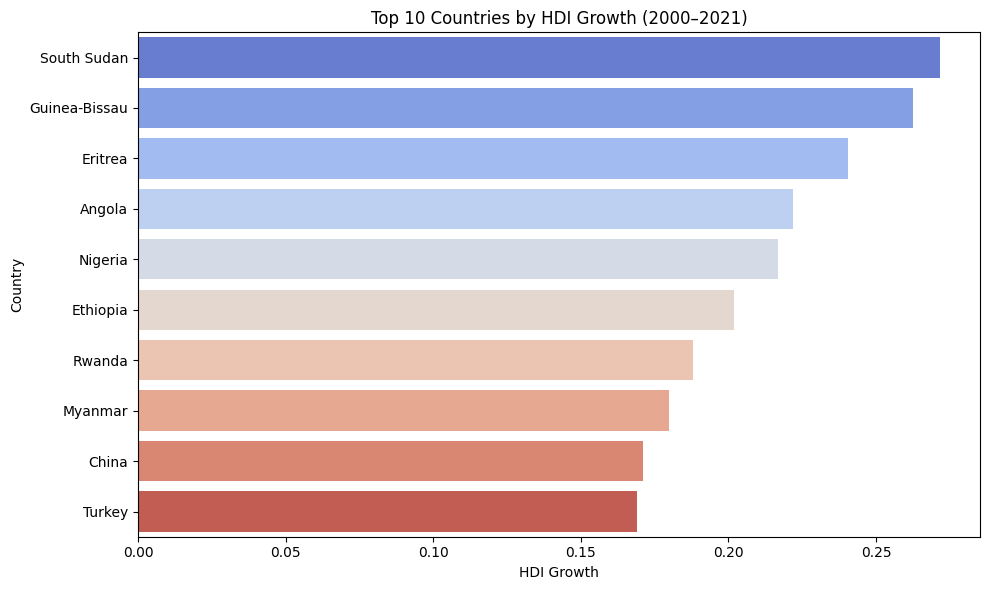

In [136]:
# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=top_hdi, y='country', x='hdi_growth', palette='coolwarm')
plt.title('Top 10 Countries by HDI Growth (2000–2021)')
plt.xlabel('HDI Growth')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

### EDA Question 3: Which factors are highly correlated with life expectancy?

In [137]:
# Correlation matrix focused on life expectancy
correlations = merged_df.corr(numeric_only=True)
life_corr = correlations['life_expectancy_at_birth_years'].sort_values(ascending=False)

print("Top Positive Correlations with Life Expectancy:\n", life_corr.head(6))
print("\nTop Negative Correlations with Life Expectancy:\n", life_corr.tail(5))


Top Positive Correlations with Life Expectancy:
 life_expectancy_at_birth_years                   1.000000
hdi                                              0.826773
gdp_per_capita_usd                               0.549062
individuals_using_the_internet__of_population    0.513566
electric_power_consumption_kwh_per_capita        0.365979
year                                             0.236142
Name: life_expectancy_at_birth_years, dtype: float64

Top Negative Correlations with Life Expectancy:
 unemployment__of_total_labor_force_modeled_ilo_estimate    0.035974
death_rate_crude_per_1000_people                          -0.664155
hdi_rank_2021                                             -0.835685
birth_rate_crude_per_1000_people                          -0.864584
infant_mortality_rate_per_1000_live_births                -0.920102
Name: life_expectancy_at_birth_years, dtype: float64


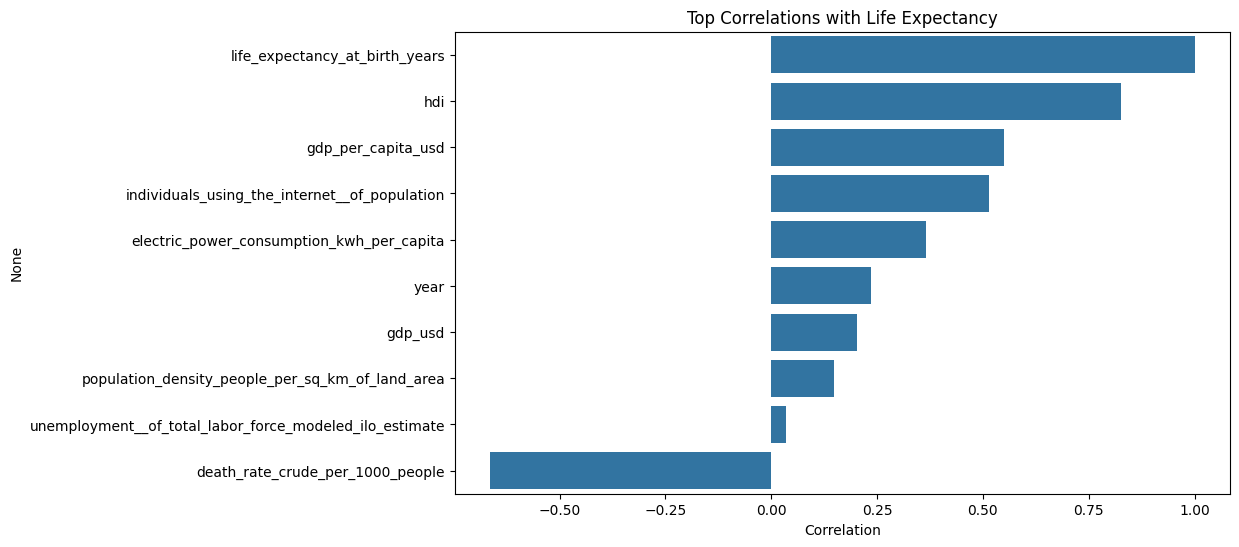

In [138]:
# Visualize top correlations
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=life_corr.head(10).values, y=life_corr.head(10).index)
plt.title("Top Correlations with Life Expectancy")
plt.xlabel("Correlation")
plt.show()

## 6.Build a regression model to predict Life Expectancy using features like GDP per capita, HDI, and other economic indicators.

#### Step 1: Feature Selection

In [139]:
# Select features for modeling
features = [
    'gdp_per_capita_usd',
    'population_density_people_per_sq_km_of_land_area',
    'electric_power_consumption_kwh_per_capita',
    'hdi'
]

# Drop NA rows for selected features + target
model_df = merged_df[features + ['life_expectancy_at_birth_years']].dropna()

# Separate features and target
X = model_df[features]
y = model_df['life_expectancy_at_birth_years']


### Step 2: Split Data

In [140]:
from sklearn.model_selection import train_test_split

# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### Step 3: Train Models
**1. Linear Regression**

In [141]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

**2. Random Forest Regressor**

In [142]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

### Step 4: Model Evaluation

In [143]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def evaluate_model(name, y_true, y_pred):
    print(f"--- {name} ---")
    print(f"R² Score: {r2_score(y_true, y_pred):.4f}")
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"RMSE: {rmse:.4f}")
    print()

# Ensure rf and y_pred_rf are defined
if 'rf' not in locals():
    from sklearn.ensemble import RandomForestRegressor
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X_train, y_train)
if 'y_pred_rf' not in locals():
    y_pred_rf = rf.predict(X_test)

# Evaluate both models
evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest Regressor", y_test, y_pred_rf)


--- Linear Regression ---
R² Score: 0.6700
RMSE: 5.4419

--- Random Forest Regressor ---
R² Score: 0.9422
RMSE: 2.2784



## 7.Step-by-Step Clustering Plan

 - Select relevant features

 - Normalize the data

 - Apply K-Means clustering

 - Visualize clusters

**1. Feature Selection for Clustering**

In [144]:
# Select one row per country for latest available year (e.g., 2018 or max year)
latest_year = merged_df['year'].max()
df_latest = merged_df[merged_df['year'] == latest_year]

# Drop countries with missing values
cluster_features = [
    'country', 'gdp_per_capita_usd', 'population_density_people_per_sq_km_of_land_area', 'life_expectancy_at_birth_years', 'hdi', 'electric_power_consumption_kwh_per_capita'
]
df_cluster = df_latest[cluster_features].dropna()
df_cluster.set_index('country', inplace=True)

# Data to feed into the model
X_cluster = df_cluster.copy()


**2. Normalize the Data**

In [145]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)


**3. Apply K-Means Clustering**

In [146]:
from sklearn.cluster import KMeans

# Try 3 clusters (adjust based on elbow curve later)
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster['cluster'] = kmeans.fit_predict(X_scaled)


**4. Visualize Clusters**

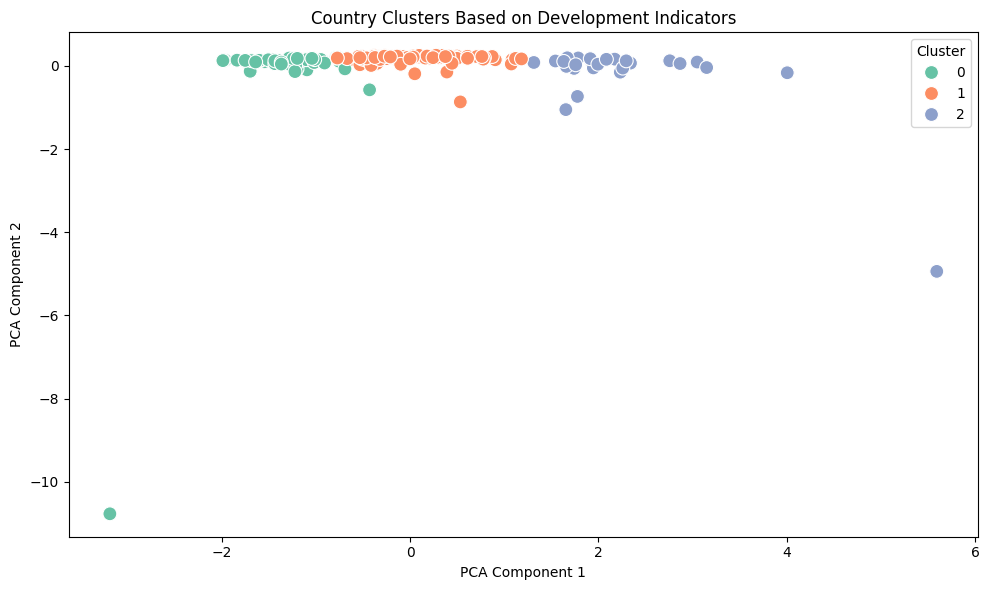

In [147]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_cluster['pca1'] = X_pca[:, 0]
df_cluster['pca2'] = X_pca[:, 1]

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cluster, x='pca1', y='pca2', hue='cluster', palette='Set2', s=100)
plt.title("Country Clusters Based on Development Indicators")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


**5. Inspect Cluster Composition**

In [148]:
# Number of countries per cluster
print(df_cluster['cluster'].value_counts())

# List of countries per cluster
for c in sorted(df_cluster['cluster'].unique()):
    print(f"\nCluster {c}:")
    print(df_cluster[df_cluster['cluster'] == c].index.tolist())


cluster
1    74
0    47
2    26
Name: count, dtype: int64

Cluster 0:
['Afghanistan', 'Angola', 'Bangladesh', 'Benin', 'Bhutan', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Djibouti', 'Ethiopia', 'Ghana', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Honduras', 'India', 'Kenya', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Nicaragua', 'Niger', 'Nigeria', 'Pakistan', 'Papua New Guinea', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Sierra Leone', 'Sudan', 'Timor-Leste', 'Togo', 'Uganda', 'Zambia', 'Zimbabwe']

Cluster 1:
['Albania', 'Algeria', 'Argentina', 'Armenia', 'Azerbaijan', 'Belarus', 'Belize', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Cabo Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Estonia', 'Fiji', 'Gabon', 'Georgia', 'Greece', 'Guyan

- i have clustered countries based on multiple development indicators.

- Each cluster represents a different development profile

In [149]:
# Join cluster labels back to merged_df
cluster_map = df_cluster['cluster'].reset_index()
merged_clustered = merged_df.merge(cluster_map, on='country', how='left')
